In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2025W1) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
- **We are not allowing group submission for this homework assignment.**   

- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 
   
</div>

_Points:_ 5

<!-- END QUESTION -->

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._


<br><br>

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

## Exercise 1: Dataset and preliminary EDA
<hr>


In this homework, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). If it’s not already in the data folder, download the CSV and save it as `adult.csv` inside the `data` folder of this homework directory.

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Typically, having more data for training is beneficial. However, in this lab, we'll be using a 40%/60% split because running cross-validation with this dataset can take a long time on a modest laptop. Using a smaller training set will make the model training a bit faster on your laptop. Additionally, with a larger test split, we’ll obtain a more reliable estimate of the model's performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

In [4]:
train_df = None
test_df = None
train_df, test_df = train_test_split(census_df, test_size=0.60, random_state=123)
print(train_df.shape)
print(test_df.shape)

(13024, 15)
(19537, 15)


In [5]:
grader.check("q1.1")

q1.1 results: All test cases passed!

### referencing Exercise 1.1
* [Lecture 5: Preprocessing and sklearn pipelines](https://ubc-cs.github.io/cpsc330-2025W1/lectures/notes/05_preprocessing-pipelines.html)

Let's examine our `train_df`. 

In [6]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [7]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [8]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 1.2 `describe()` method
rubric={autograde}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What are the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns, irrespective of whether you want to include them in your model or not, as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 5

In [9]:
census_summary = train_df.describe(include='all')
census_summary

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12284,1.302400e+04,13024,13024.000000,13024,12281,13024,13024,13024,13024.000000,13024.000000,13024.000000,12783,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9123,NaN,4153,NaN,5936,1649,5195,11158,8700,NaN,NaN,NaN,11717,9875
mean,38.546913,NaN,1.884759e+05,NaN,10.057432,NaN,NaN,NaN,NaN,NaN,1079.831695,86.543074,40.395654,NaN,NaN
std,13.610225,NaN,1.040895e+05,NaN,2.553084,NaN,NaN,NaN,NaN,NaN,7322.034546,403.025863,12.285347,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.170962e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778990e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.365655e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
max_hours_per_week =  float(census_summary.loc["max", "hours.per.week"])
max_hours_per_week

99.0

In [11]:
most_freq_occupation = census_summary.loc["top", "occupation"]
most_freq_occupation

'Prof-specialty'

In [12]:
missing_vals_cols = census_summary.loc['count'].index[census_summary.loc['count'] < len(train_df)].to_list()
numeric_cols = census_summary.loc['mean'].index[census_summary.loc['mean'].notna()].to_list()
print(missing_vals_cols)
print(numeric_cols)

['workclass', 'occupation', 'native.country']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [13]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [14]:
grader.check("q1.2")

q1.2 results: All test cases passed!

### referencing Exercise 1.2
* [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
* [pandas.Series.index](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
* [pandas.DataFrame.notna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html)

<!-- BEGIN QUESTION -->

### 1.3 Visualizing features
rubric={viz,reasoning}

**Your tasks:**

1. For each numeric feature listed in `numeric_cols`, generate overlapping histograms for the <=50K and >50K classes, similar to how you did it in homework 2.
2. Provide a brief description of your preliminary observations based on the histograms. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 4

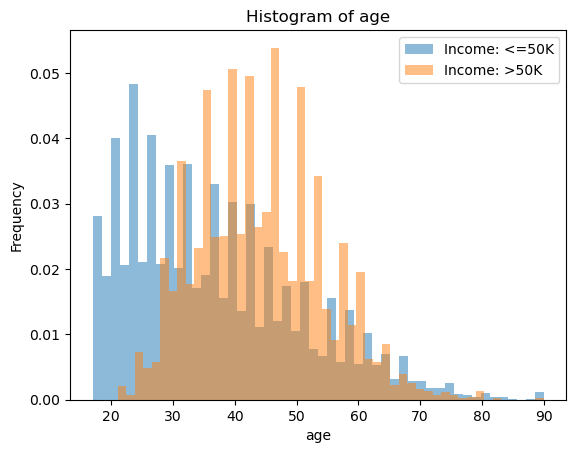

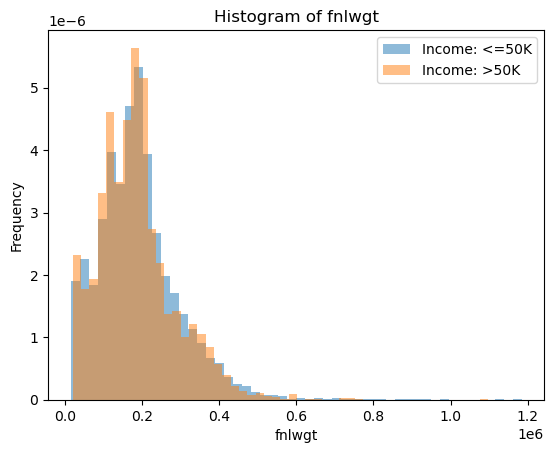

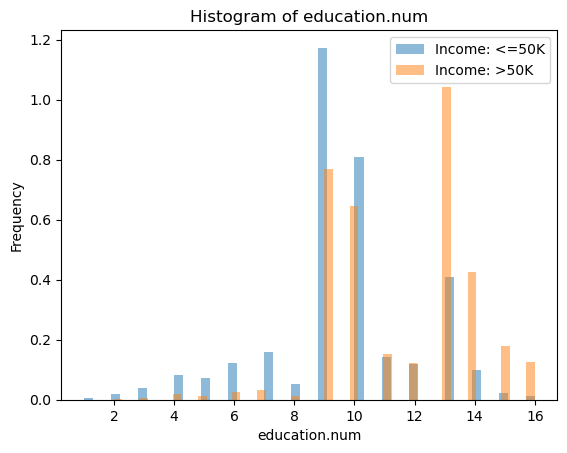

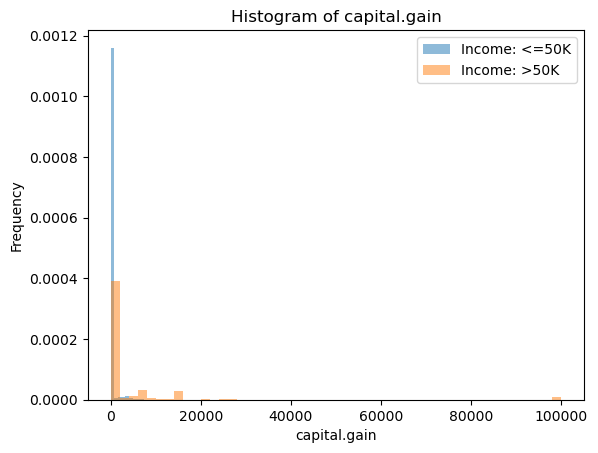

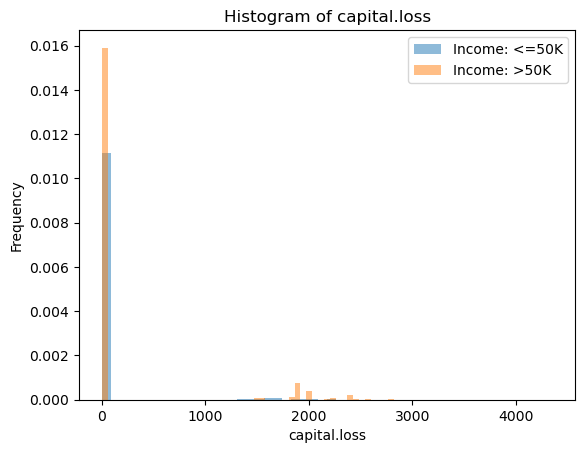

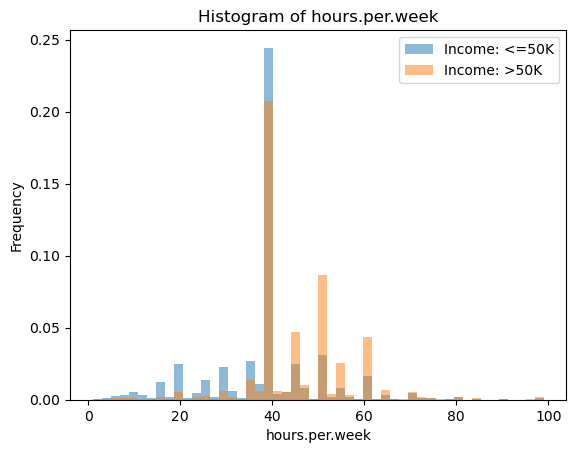

In [15]:
features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

for feat in features:
    train_df[train_df["income"] == "<=50K"][feat].plot.hist(
        bins=50, alpha=0.5, density=True, label="Income: <=50K"
    )
    train_df[train_df["income"] == ">50K"][feat].plot.hist(
        bins=50, alpha=0.5, density=True, label="Income: >50K"
    )
    
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.legend()
    plt.show()

2.
* age: Income >50K tends to fall within the 40–60 age range, whereas income <=50K is more common under age 30.
* fnlwgt: There are not many differences between the >50K and <=50K groups.
* education.num: Individuals with higher education levels are more likely to have income >50K.
* capital.gain: Most people report 0, but some individuals in the >50K group have higher capital gains.
* capital.loss: Most people report 0, but some individuals in the >50K group have higher capital losses.
* hours.per.week: Both groups tend to work about 40 hours per week, but people working more than 40 hours are more likely to have income >50K.

<!-- END QUESTION -->

<br><br><br><br>

### referencing Exercise 1.3
* homework2 Question3.6

## Exercise 2: Identifying different feature types and transformations  
<hr>

Typically, data isn't readily formatted for direct input into machine learning models. It's crucial for a machine learning practitioner to examine each column and determine an effective method for encoding its information. Let's determine the types of features we have and come up with suitable encoding strategies for them. 

<!-- BEGIN QUESTION -->

### 2.1 Identify transformations to apply
rubric={reasoning}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below for the purpose of autograding. 

> You can find the information about the columns [here](http://archive.ics.uci.edu/ml/datasets/Adult).

<div class="alert alert-warning">

Solution_2.1
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling with `StandardScaler` |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding | |
| fnlwgt | drop |  |
| education | ordinal encoding | |
| education.num | drop | |
| marital.status | one-hot encoding  | |
| occupation | imputation, one-hot encoding  | |
| relationship | one-hot encoding  | |
| race | drop  |  |
| sex | one-hot encoding with "binary=True" | |
| capital.gain | scaling with `StandardScaler` |  | 
| capital.loss | scaling with `StandardScaler` |  |
| hours.per.week | scaling with `StandardScaler` | |
| native.country | imputation, one-hot encoding | | 


_Points:_ 13

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling with `StandardScaler` |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding |  A categorical feature describing the type of employment, with some missing values. Missing values should be imputed, and one-hot encoding is more appropriate than ordinal encoding because there is no natural order among these categories.
| fnlwgt | drop |  A numeric feature. From the histograms in 1.3, there are not many differences between the >50K and <=50K groups, so this feature is unlikely to be useful for predicting income and is better dropped from the feature set. |
| education | ordinal encoding | A categorical feature describing the education level, with no missing values. Since the categories have a natural ordering, ordinal encoding is suitable. |
| education.num | drop | numeric feature describing the education level. This feature is redundant since education is already included, so it is better to drop. |
| marital.status | one-hot encoding  | A categorical feature describing marital status, with no missing values. One-hot encoding is suitable as there is no natural ordering among the categories. |
| occupation | imputation, one-hot encoding  | A categorical feature describing occupation, with some missing values. Missing values should be imputed, and one-hot encoding is appropriate as there is no natural order among the categories. |
| relationship | one-hot encoding  | A categorical feature describing household relationships, with no missing values. One-hot encoding is suitable as there is no natural order.|
| race | drop  |  categorical feature describing race, with no missing values. Race does not appear strongly related to income, and using it may raise ethical concerns, so it is better to drop. |
| sex | one-hot encoding with "binary=True" | A binary categorical feature describing gender (male or female), with no missing values. One-hot encoding with binary=True is suitable since it can be represented as a single binary variable.|
| capital.gain | scaling with `StandardScaler` |  A numeric feature describing capital gains, without missing values. The data includes some zeros and very large values, so scaling is recommended to reduce their effect on prediction. |
| capital.loss | scaling with `StandardScaler` |  A numeric feature describing capital losses, without missing values. Similar to capital.gain, it consists of some zeros and large values, so scaling is recommended to improve prediction. |
| hours.per.week | scaling with `StandardScaler` | A numeric feature describing weekly working hours, without missing values. Values range from 1 to 99, and standardization is recommended so that differences in scale do not affect the model. |
| native.country | imputation, one-hot encoding | A categorical feature describing the individual’s country of origin, with some missing values. Missing values should be imputed, and since there is no natural order among countries, one-hot encoding is appropriate. |


<!-- END QUESTION -->

<br><br>

### referencing Exercise 2.1
* [Lecture 5: Preprocessing and sklearn pipelines](https://ubc-cs.github.io/cpsc330-2025W1/lectures/notes/05_preprocessing-pipelines.html)
* [Lecture 6: sklearn ColumnTransformer and Text Features](https://ubc-cs.github.io/cpsc330-2025W1/lectures/notes/06_column-transformer-text-feats.html)

### 2.2 Identify feature types 
rubric={autograde}


**Your tasks:**
1. Based on the types of transformations we want to apply on the features above, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.2
    
</div>

_Points:_ 5

In [16]:
# Fill in the lists below.
numeric_features = ["age", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["workclass", "marital.status", "occupation", "relationship", "native.country "]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt", "education.num", "race"]
target = "income"

In [17]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [18]:
grader.check("q2.2")

q2.2 results:
    q2.2 - 1 result:
        ❌ Test case failed
        Trying:
            assert sha1(str(numeric_features).encode('utf8')).hexdigest() == '71401cf60034fd69eee7398866359f612adf3e15', 'numeric_features list is not correct'
        Expecting nothing
        ok
        Trying:
            assert sha1(str(categorical_features).encode('utf8')).hexdigest() == 'af1a4022c0362405678be5c3a6735578a8c0069f', 'categorical_features list is not correct'
        Expecting nothing
        **********************************************************************
        Line 2, in q2.2 0
        Failed example:
            assert sha1(str(categorical_features).encode('utf8')).hexdigest() == 'af1a4022c0362405678be5c3a6735578a8c0069f', 'categorical_features list is not correct'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q2.2 0[1]>", line 1, in <module>
                assert sha1(str(categorical_features).encode('utf8')).hexdigest() == 'af1a4022c0362405678be5c3a6735578a8c0069f', 'categorical_features list is not correct'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: categorical_features list is not correct
        Trying:
            assert sha1(str(ordinal_features).encode('utf8')).hexdigest() == '95b86602c44211f3ad662bb58b8e53d024106d05', 'ordinal_features list is not correct'
        Expecting nothing
        ok
        Trying:
            assert sha1(str(binary_features).encode('utf8')).hexdigest() == 'd4b7aa4c56ac2f98e6ac9cec7768484b415b7337', 'binary_features list is not correct'
        Expecting nothing
        ok
        Trying:
            assert sha1(str(drop_features).encode('utf8')).hexdigest() == '62aab57d42c54be3dfd3c55020e5a167ca1a84c3', 'drop_features list is not correct'
        Expecting nothing
        ok
        Trying:
            assert sha1(str(target).encode('utf8')).hexdigest() == '0f613350b66e64d92ef21bc4dcdbf8996cb4edf0', 'target variable is not set correctly'
        Expecting nothing
        ok

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 1

In [19]:
X_train = None
y_train = None
X_test = None
y_test = None

...

Ellipsis

In [20]:
grader.check("q3.1")

q3.1 results:
    q3.1 - 1 result:
        ❌ Test case failed
        Trying:
            assert not X_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Expecting nothing
        **********************************************************************
        Line 1, in q3.1 0
        Failed example:
            assert not X_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.1 0[0]>", line 1, in <module>
                assert not X_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
                           ^^^^^^^^^^^^^^^
            AssertionError: Your answer does not exist. Have you passed in the correct variable?
        Trying:
            assert not y_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Expecting nothing
        **********************************************************************
        Line 2, in q3.1 0
        Failed example:
            assert not y_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.1 0[1]>", line 1, in <module>
                assert not y_train is None, 'Your answer does not exist. Have you passed in the correct variable?'
                           ^^^^^^^^^^^^^^^
            AssertionError: Your answer does not exist. Have you passed in the correct variable?
        Trying:
            assert not X_test is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Expecting nothing
        **********************************************************************
        Line 3, in q3.1 0
        Failed example:
            assert not X_test is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.1 0[2]>", line 1, in <module>
                assert not X_test is None, 'Your answer does not exist. Have you passed in the correct variable?'
                           ^^^^^^^^^^^^^^
            AssertionError: Your answer does not exist. Have you passed in the correct variable?
        Trying:
            assert not y_test is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Expecting nothing
        **********************************************************************
        Line 4, in q3.1 0
        Failed example:
            assert not y_test is None, 'Your answer does not exist. Have you passed in the correct variable?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/

<br><br>

### 3.2 Dummy classifier
rubric={autograde}

**Your tasks:**

1. Carry out 5-fold cross-validation using [`scikit-learn`'s `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 1

In [21]:
dummy_df = None 

...

Ellipsis

In [22]:
grader.check("q3.2")

q3.2 results:
    q3.2 - 1 result:
        ❌ Test case failed
        Trying:
            assert not dummy_df is None, 'Have you used the correct variable to store the results?'
        Expecting nothing
        **********************************************************************
        Line 1, in q3.2 0
        Failed example:
            assert not dummy_df is None, 'Have you used the correct variable to store the results?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.2 0[0]>", line 1, in <module>
                assert not dummy_df is None, 'Have you used the correct variable to store the results?'
                           ^^^^^^^^^^^^^^^^
            AssertionError: Have you used the correct variable to store the results?
        Trying:
            assert sorted(list(dummy_df.columns)) == ['fit_time', 'score_time', 'test_score', 'train_score'], 'Your solution contains incorrect columns.'
        Expecting nothing
        **********************************************************************
        Line 2, in q3.2 0
        Failed example:
            assert sorted(list(dummy_df.columns)) == ['fit_time', 'score_time', 'test_score', 'train_score'], 'Your solution contains incorrect columns.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.2 0[1]>", line 1, in <module>
                assert sorted(list(dummy_df.columns)) == ['fit_time', 'score_time', 'test_score', 'train_score'], 'Your solution contains incorrect columns.'
                                   ^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'columns'
        Trying:
            assert dummy_df.shape == (5, 4), 'Are you carrying out 5-fold cross-validation and are you passing return_train_score=True?'
        Expecting nothing
        **********************************************************************
        Line 3, in q3.2 0
        Failed example:
            assert dummy_df.shape == (5, 4), 'Are you carrying out 5-fold cross-validation and are you passing return_train_score=True?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q3.2 0[2]>", line 1, in <module>
                assert dummy_df.shape == (5, 4), 'Are you carrying out 5-fold cross-validation and are you passing return_train_score=True?'
                       ^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'shape'
        Trying:
            assert np.isclose(round(dummy_df['test_score'].mean(), 3), 0.758), 'The test scores seem wrong. Are you calling the cross_validate correctly?'
        Expecting nothing
        **********************************************************************
        Line 4, in q3.2 0
        Failed example:
            assert np.isclose(round(dummy_df['test_score'].mean

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={reasoning}

**Your tasks:**
1. Hopefully, you successfully run cross-validation with the dummy classifier in the previous question. Now, if you were to train the [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train`, would it work? Briefly explain your reasoning.

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column transformer 
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. First, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer` using `make_column_transformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [23]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [24]:
ordinal_transformer = None

...

Ellipsis

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

In [27]:
grader.check("q4.1")

q4.1 results:
    q4.1 - 1 result:
        ❌ Test case failed
        Trying:
            assert not ordinal_transformer is None, 'Are you using the correct variable name?'
        Expecting nothing
        **********************************************************************
        Line 1, in q4.1 0
        Failed example:
            assert not ordinal_transformer is None, 'Are you using the correct variable name?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.1 0[0]>", line 1, in <module>
                assert not ordinal_transformer is None, 'Are you using the correct variable name?'
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Are you using the correct variable name?
        Trying:
            assert type(ordinal_transformer.get_params()['categories'][0]) is list, 'Are you passing education levels as a list of lists?'
        Expecting nothing
        **********************************************************************
        Line 2, in q4.1 0
        Failed example:
            assert type(ordinal_transformer.get_params()['categories'][0]) is list, 'Are you passing education levels as a list of lists?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.1 0[1]>", line 1, in <module>
                assert type(ordinal_transformer.get_params()['categories'][0]) is list, 'Are you passing education levels as a list of lists?'
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert ordinal_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
        Expecting nothing
        **********************************************************************
        Line 3, in q4.1 0
        Failed example:
            assert ordinal_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.1 0[2]>", line 1, in <module>
                assert ordinal_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert sha1(str(ordinal_transformer.get_params()['categories'][0]).encode('utf8')).hexdigest() == '893a03d114b2af09b53247866c6eea54ebfd090f' or sha1(str(ordinal_transformer.get_params()['categories'][0]).encode('utf8')).hexdigest() == '81059b8bebc9ddb03d61bf07cfd9b9b6b0da288e', "Make sure you are passing categories sorted on levels of education. (Ascending or descending shouldn't matter.)"
        Expecting nothing
        **********************************************************************
        Lin

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features to encode binary features as integers 0 and 1.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [28]:
binary_transformer = None
...

In [29]:
grader.check("q4.2")

q4.2 results:
    q4.2 - 1 result:
        ❌ Test case failed
        Trying:
            assert not binary_transformer is None, 'Are you using the correct variable name?'
        Expecting nothing
        **********************************************************************
        Line 1, in q4.2 0
        Failed example:
            assert not binary_transformer is None, 'Are you using the correct variable name?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.2 0[0]>", line 1, in <module>
                assert not binary_transformer is None, 'Are you using the correct variable name?'
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Are you using the correct variable name?
        Trying:
            assert binary_transformer.get_params()['drop'] == 'if_binary', 'Are you passing `drop=if_binary`?'
        Expecting nothing
        **********************************************************************
        Line 2, in q4.2 0
        Failed example:
            assert binary_transformer.get_params()['drop'] == 'if_binary', 'Are you passing `drop=if_binary`?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.2 0[1]>", line 1, in <module>
                assert binary_transformer.get_params()['drop'] == 'if_binary', 'Are you passing `drop=if_binary`?'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert binary_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
        Expecting nothing
        **********************************************************************
        Line 3, in q4.2 0
        Failed example:
            assert binary_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.2 0[2]>", line 1, in <module>
                assert binary_transformer.get_params()['dtype'] == int, 'Please set the dtype to int'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde}

There are a few categorical features with missing values in our dataset. Our initial step is to impute these missing values before proceeding to one-hot encode the features. For this assignment, apply imputation to all categorical features, regardless of whether they have missing values. If a feature lacks missing values, the imputation step will have no effect.

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps:
- `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"`
- `OneHotEncoder` with `handle_unknown="ignore"` and `sparse_output=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [30]:
categorical_transformer = None

...

Ellipsis

In [31]:
grader.check("q4.3")

q4.3 results:
    q4.3 - 1 result:
        ❌ Test case failed
        Trying:
            from sklearn.pipeline import make_pipeline, Pipeline
        Expecting nothing
        ok
        Trying:
            assert not categorical_transformer is None, 'Are you using the correct variable name?'
        Expecting nothing
        **********************************************************************
        Line 2, in q4.3 0
        Failed example:
            assert not categorical_transformer is None, 'Are you using the correct variable name?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.3 0[1]>", line 1, in <module>
                assert not categorical_transformer is None, 'Are you using the correct variable name?'
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Are you using the correct variable name?
        Trying:
            assert type(categorical_transformer) is Pipeline, 'Are you creating a scikit-learn Pipeline?'
        Expecting nothing
        **********************************************************************
        Line 3, in q4.3 0
        Failed example:
            assert type(categorical_transformer) is Pipeline, 'Are you creating a scikit-learn Pipeline?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.3 0[2]>", line 1, in <module>
                assert type(categorical_transformer) is Pipeline, 'Are you creating a scikit-learn Pipeline?'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Are you creating a scikit-learn Pipeline?
        Trying:
            assert len(categorical_transformer.get_params()['steps']) == 2, 'Are you creating a pipeline with two steps?'
        Expecting nothing
        **********************************************************************
        Line 4, in q4.3 0
        Failed example:
            assert len(categorical_transformer.get_params()['steps']) == 2, 'Are you creating a pipeline with two steps?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.3 0[3]>", line 1, in <module>
                assert len(categorical_transformer.get_params()['steps']) == 2, 'Are you creating a pipeline with two steps?'
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert categorical_transformer.get_params()['simpleimputer__strategy'] == 'constant', 'Are you passing strategy=constant in the SimpleImputer?'
        Expecting nothing
        **********************************************************************
        Line 5, in q4.3 0
        Failed example:
            assert categorical_transformer.get_params()['simpleimputer__strategy'] == 'constant', 

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [32]:
preprocessor = None

...

Ellipsis

In [33]:
transformed_df = None
n_new_cols = None

...

Ellipsis

In [34]:
grader.check("q4.4")

q4.4 results:
    q4.4 - 1 result:
        ❌ Test case failed
        Trying:
            assert not preprocessor is None, 'Are you using the correct variable name?'
        Expecting nothing
        **********************************************************************
        Line 1, in q4.4 0
        Failed example:
            assert not preprocessor is None, 'Are you using the correct variable name?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.4 0[0]>", line 1, in <module>
                assert not preprocessor is None, 'Are you using the correct variable name?'
                           ^^^^^^^^^^^^^^^^^^^^
            AssertionError: Are you using the correct variable name?
        Trying:
            assert len(preprocessor.get_params()['transformers']) in range(4, 6, 1), 'Have you included all the transformers?'
        Expecting nothing
        **********************************************************************
        Line 2, in q4.4 0
        Failed example:
            assert len(preprocessor.get_params()['transformers']) in range(4, 6, 1), 'Have you included all the transformers?'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.4 0[1]>", line 1, in <module>
                assert len(preprocessor.get_params()['transformers']) in range(4, 6, 1), 'Have you included all the transformers?'
                           ^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert 'onehotencoder' in preprocessor.get_params().keys(), 'Either the categorical_transformer or binary_transformer is not included.'
        Expecting nothing
        **********************************************************************
        Line 3, in q4.4 0
        Failed example:
            assert 'onehotencoder' in preprocessor.get_params().keys(), 'Either the categorical_transformer or binary_transformer is not included.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/michika/miniforge3/envs/cpsc330/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4.4 0[2]>", line 1, in <module>
                assert 'onehotencoder' in preprocessor.get_params().keys(), 'Either the categorical_transformer or binary_transformer is not included.'
                                          ^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'NoneType' object has no attribute 'get_params'
        Trying:
            assert 'standardscaler' in preprocessor.get_params().keys(), 'numeric_transformer is not included.'
        Expecting nothing
        **********************************************************************
        Line 4, in q4.4 0
        Failed example:
            assert 'standardscaler' in preprocessor.get_params().keys(), 'numeric_transformer is not included.'
        Exception raised:
            Traceback (most r

<br><br>

<!-- BEGIN QUESTION -->

### 4.5 Short answer questions
rubric={reasoning}

**Your tasks:**

Answer each of the following questions in 2 to 3 sentences. 

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_4.5
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [35]:
results_dict = {}  # dictionary to store all the results

In [36]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below, I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [37]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

InvalidParameterError: The 'X' parameter of cross_validate must be an array-like or a sparse matrix. Got None instead.

<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers
rubric={accuracy,quality}

**Your tasks:**

1. For each model provided in the starter code below:
    - Create a pipeline using `make_pipeline` with two steps: the preprocessor from section 4.4 and the model as your classifier.
    - Conduct 5-fold cross-validation using the pipeline. Obtain the mean cross-validation scores and standard deviation using the `mean_std_cross_val_scores` function provided earlier.
    - Record the results in a dataframe named `income_pred_results_df`. Use the model names from the models dictionary below as the index. Each row should represent results from the `mean_std_cross_val_scores` function. In essence, `income_pred_results_df` should resemble the `results_df` dataframe mentioned earlier, but with additional rows for the subsequent models.

> Note: The execution might take some time. Please be patient!"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [ ]:
income_pred_results_df = None 
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={reasoning}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 

1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models (excluding the dummy model), which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={accuracy,quality}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? In this assignment, consider the hyperparameter value that gives you the highest cross-validation score as the "best" one. Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the highest CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [ ]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
best_C = None

...

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 3

In [ ]:
final_pipeline = None
test_score = None

...

In [ ]:
grader.check("q6.1")

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

